In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from datetime import datetime
from fpdf import FPDF

In [7]:
#Loading DataSets
def load_data():
    customers=pd.read_csv('Customers.csv')
    products=pd.read_csv('Products.csv')
    transactions=pd.read_csv('Transactions.csv')
    # Convert date columns to datetime
    customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
    
    return customers,products,transactions

In [8]:
print(customers.head())

NameError: name 'customers' is not defined

In [9]:
print(products.head())

NameError: name 'products' is not defined

In [10]:
print(transactions.head())

NameError: name 'transactions' is not defined

Exploratory Data Analysis (EDA) and Business Insights


In [11]:
#Checking Duplicate Values
customers.nunique()
products.nunique()
transactions.nunique()

NameError: name 'customers' is not defined

In [12]:
#Checking Missing Values
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()

NameError: name 'customers' is not defined

PDF saved as 'Ankita_Jaiswal_EDA.pdf'


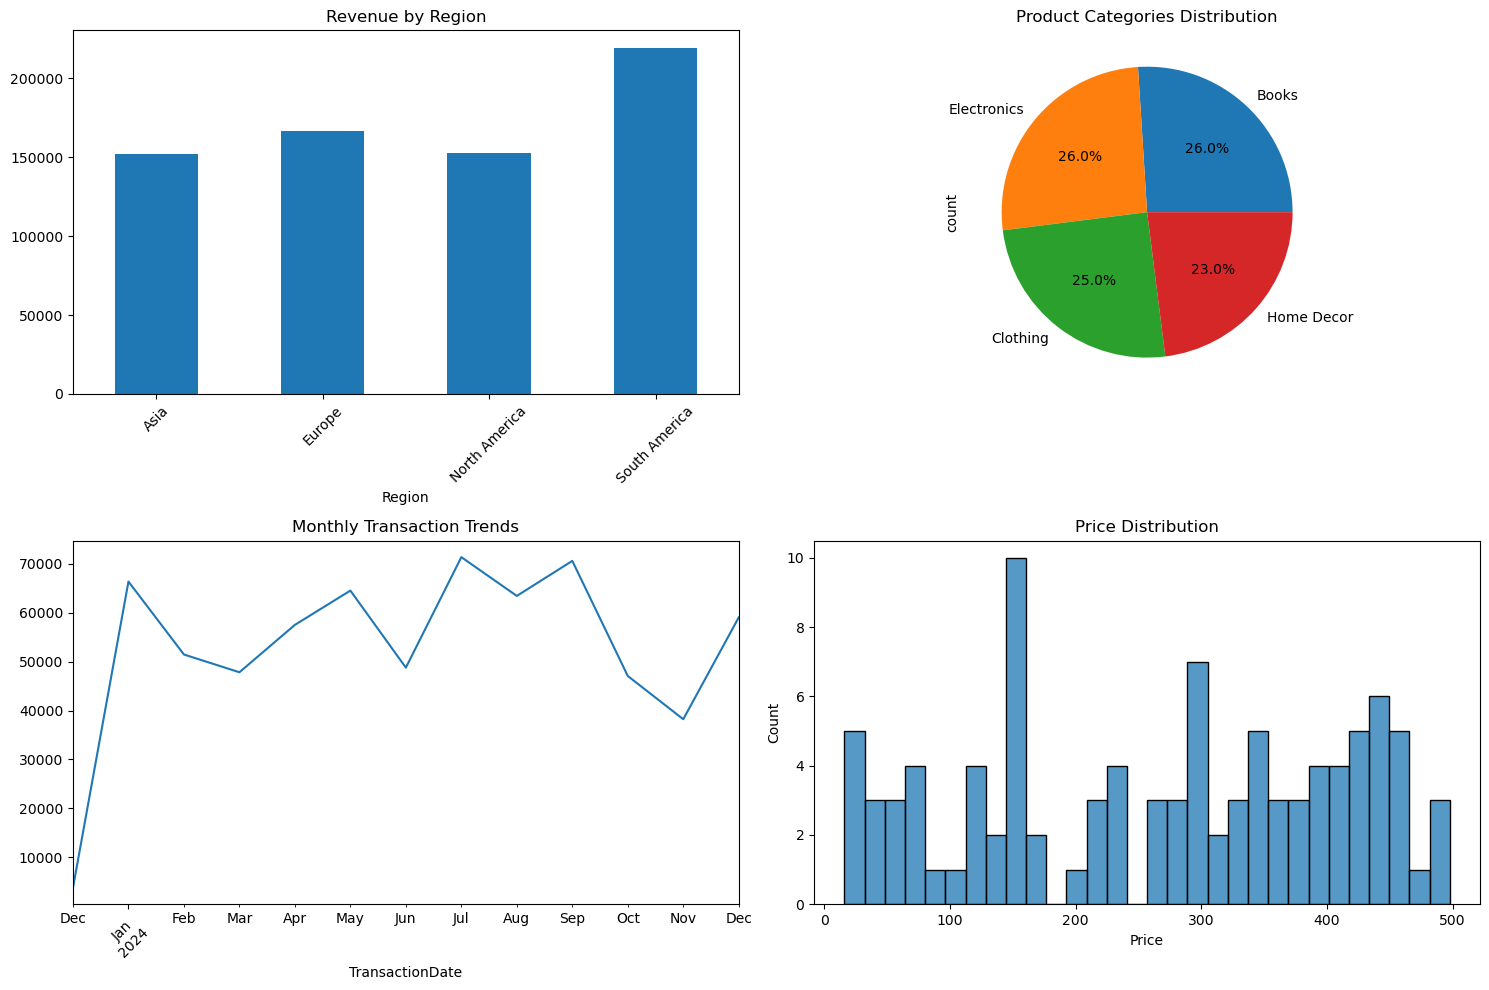

In [15]:
def perform_eda():
    customers, products, transactions = load_data()
    
    # Merge datasets for comprehensive analysis
    full_data = transactions.merge(customers, on='CustomerID')\
                              .merge(products, on='ProductID')
    
    # 1. Customer Analysis
    customer_stats = {
        'total_customers': len(customers),
        'customers_by_region': customers['Region'].value_counts(),
        'avg_customer_age_days': (datetime.now() - customers['SignupDate']).mean().days
    }
    
    # 2. Product Analysis
    product_stats = {
        'total_products': len(products),
        'products_by_category': products['Category'].value_counts(),
        'price_stats': products['Price'].describe()
    }
    
    # 3. Transaction Analysis
    transaction_stats = {
        'total_transactions': len(transactions),
        'total_revenue': transactions['TotalValue'].sum(),
        'avg_transaction_value': transactions['TotalValue'].mean(),
        'transactions_by_month': transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TransactionID'].count()
    }
    
    # 4. Customer Purchase Patterns
    customer_purchase_patterns = full_data.groupby('CustomerID').agg({
        'TransactionID': 'count',
        'TotalValue': 'sum',
        'Quantity': 'sum'
    }).rename(columns={
        'TransactionID': 'total_purchases',
        'TotalValue': 'total_spent',
        'Quantity': 'total_items'
    })
    
    # 5. Category Performance
    category_performance = full_data.groupby('Category').agg({
        'TransactionID': 'count',
        'TotalValue': 'sum',
        'Quantity': 'sum'
    }).rename(columns={
        'TransactionID': 'total_sales',
        'TotalValue': 'total_revenue',
        'Quantity': 'total_quantity'
    })
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Revenue by Region
    plt.subplot(2, 2, 1)
    revenue_by_region = full_data.groupby('Region')['TotalValue'].sum()
    revenue_by_region.plot(kind='bar')
    plt.title('Revenue by Region')
    plt.xticks(rotation=45)
    
    # Plot 2: Product Categories Distribution
    plt.subplot(2, 2, 2)
    products['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Product Categories Distribution')
    
    # Plot 3: Monthly Transaction Trends
    plt.subplot(2, 2, 3)
    monthly_transactions = full_data.groupby(full_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    monthly_transactions.plot(kind='line')
    plt.title('Monthly Transaction Trends')
    plt.xticks(rotation=45)
    
    # Plot 4: Price Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(products['Price'], bins=30)
    plt.title('Price Distribution')
    
    plt.tight_layout()
    plt.savefig('eda_visualizations.png')
    
    return {
        'customer_stats': customer_stats,
        'product_stats': product_stats,
        'transaction_stats': transaction_stats,
        'customer_purchase_patterns': customer_purchase_patterns,
        'category_performance': category_performance
    }

# Generate business insights
def generate_insights(eda_results):
    insights = [
        f"Customer Base: {eda_results['customer_stats']['total_customers']} customers across "
        f"{len(eda_results['customer_stats']['customers_by_region'])} regions, with "
        f"{eda_results['customer_stats']['customers_by_region'].index[0]} being the largest market.",
        
        f"Revenue Generation: Total revenue of ${eda_results['transaction_stats']['total_revenue']:,.2f} "
        f"with average transaction value of ${eda_results['transaction_stats']['avg_transaction_value']:,.2f}",
        
        f"Product Portfolio: {eda_results['product_stats']['total_products']} products across "
        f"{len(eda_results['product_stats']['products_by_category'])} categories",
        
        "Customer Engagement: " + str(eda_results['customer_purchase_patterns']['total_purchases'].describe()),
        
        "Category Performance: " + str(eda_results['category_performance']['total_revenue'].sort_values(ascending=False).head())
    ]
    
    return insights

if __name__ == "__main__":
    eda_results = perform_eda()
    insights = generate_insights(eda_results)
    
    # Save insights to PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=20)
    pdf.add_page()
    pdf.set_font("Arial", size=14)

    # Add content to PDF
    pdf.set_font("Arial", style="B", size=16)
    pdf.cell(200, 10, txt="EDA Insights", ln=True, align="C")
    pdf.ln(10)  # Line break

    # Write insights to the PDF
    pdf.set_font("Arial", size=14)
    for i, insight in enumerate(insights, 1):
        pdf.multi_cell(0, 10, txt=f"Insight {i}: {insight}")
        pdf.ln(2)  # Line break between insights

    # Save PDF
    pdf.output("Ankita_Jaiswal_EDA.pdf")
    print("PDF saved as 'Ankita_Jaiswal_EDA.pdf'")

    